#Predicting air pollutants

In [1]:
!pip3 install pyreadr

     |████████████████████████████████| 266kB 4.6MB/s 


In [2]:
import pyreadr

#Downloading data from UK air

In [3]:
metadata_url='http://uk-air.defra.gov.uk/openair/R_data/AURN_metadata.RData'

fn = metadata_url.split('/')[-1]

In [4]:
!wget $metadata_url

--2020-08-13 05:17:50--  http://uk-air.defra.gov.uk/openair/R_data/AURN_metadata.RData
Resolving uk-air.defra.gov.uk (uk-air.defra.gov.uk)... 213.251.9.44
Connecting to uk-air.defra.gov.uk (uk-air.defra.gov.uk)|213.251.9.44|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uk-air.defra.gov.uk/openair/R_data/AURN_metadata.RData [following]
--2020-08-13 05:17:50--  https://uk-air.defra.gov.uk/openair/R_data/AURN_metadata.RData
Connecting to uk-air.defra.gov.uk (uk-air.defra.gov.uk)|213.251.9.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31218 (30K) [application/octet-stream]
Saving to: ‘AURN_metadata.RData’

AURN_metadata.RData 100%[===================>]  30.49K  --.-KB/s    in 0s      

2020-08-13 05:17:51 (257 MB/s) - ‘AURN_metadata.RData’ saved [31218/31218]



In [5]:
import pandas as pd
pyreadr.read_r(fn)['AURN_metadata'].head()

,site_id,site_name,location_type,latitude,longitude,parameter,Parameter_name,start_date,end_date,ratified_to,zone,agglomeration,local_authority
0,ABD,Aberdeen,Urban Background,57.15736,-2.094278,O3,Ozone,2003-08-01,ongoing,2020-03-31,North East Scotland,NaN,Aberdeen City
1,ABD,Aberdeen,Urban Background,57.15736,-2.094278,NO,Nitric oxide,1999-09-18,ongoing,2020-03-31,North East Scotland,NaN,Aberdeen City
2,ABD,Aberdeen,Urban Background,57.15736,-2.094278,NO2,Nitrogen dioxide,1999-09-18,ongoing,2020-03-31,North East Scotland,NaN,Aberdeen City
3,ABD,Aberdeen,Urban Background,57.15736,-2.094278,NOXasNO2,Nitrogen oxides as nitrogen dioxide,1999-09-18,ongoing,2020-03-31,North East Scotland,NaN,Aberdeen City
4,ABD,Aberdeen,Urban Background,57.15736,-2.094278,SO2,Sulphur dioxide,2001-01-01,2007-09-30,2007-09-30,North East Scotland,NaN,Aberdeen City


In [6]:
package_url_base = 'https://uk-air.defra.gov.uk/openair/R_data/{fn}'

In [7]:
site = 'kc1'
year = 2020

fn = '{site}_{year}.RData'.format(site=site.upper(), year=year)

url = package_url_base.format(fn=fn)
!wget $url

--2020-08-13 05:17:53--  https://uk-air.defra.gov.uk/openair/R_data/KC1_2020.RData
Resolving uk-air.defra.gov.uk (uk-air.defra.gov.uk)... 213.251.9.44
Connecting to uk-air.defra.gov.uk (uk-air.defra.gov.uk)|213.251.9.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204431 (200K) [application/octet-stream]
Saving to: ‘KC1_2020.RData’

KC1_2020.RData      100%[===================>] 199.64K   486KB/s    in 0.4s    

2020-08-13 05:17:55 (486 KB/s) - ‘KC1_2020.RData’ saved [204431/204431]



In [8]:
df = pyreadr.read_r(fn)[fn.split('.')[0]]

In [9]:
df.head()

,date,O3,NO2,CO,SO2,PM10,NOXasNO2,NO,PM2.5,temp,ws,wd,RAWPM25,site,code
0,2020-01-01 00:00:00,1.13090,46.22164,0.213586,NaN,41.850,64.75051,12.08422,35.189,2.3,2.1,92.7,37.300,London N. Kensington,KC1
1,2020-01-01 01:00:00,1.19742,45.01138,0.236887,NaN,43.000,74.07898,18.95739,36.250,1.4,2.1,98.3,38.425,London N. Kensington,KC1
2,2020-01-01 02:00:00,1.49678,41.43513,0.203878,NaN,46.025,60.49783,12.43237,39.623,1.0,2.3,116.6,42.000,London N. Kensington,KC1
3,2020-01-01 03:00:00,1.59656,39.81147,0.203878,NaN,48.525,53.50148,8.92839,41.179,0.8,1.8,131.1,43.650,London N. Kensington,KC1
4,2020-01-01 04:00:00,5.78753,33.62730,0.168928,NaN,45.400,37.65681,2.62798,40.118,0.8,1.7,108.8,42.525,London N. Kensington,KC1


##Data preparation

We are trying to predict CO, NO, PM2.5, PM10 .


**Our dataset consists of date, CO , PM10, PM2.5, NO ,TEMPERATURE , Wind Speed(WS), Wind Direction(WD).**

In [12]:
df.describe()

,O3,NO2,CO,SO2,PM10,NOXasNO2,NO,PM2.5,temp,ws,wd,RAWPM25
count,5189.000000,5340.000000,5348.000000,5332.000000,5371.000000,5341.000000,5340.000000,5363.000000,5352.000000,5352.000000,5352.000000,5363.000000
mean,59.947588,18.335906,0.284959,5.021545,13.685726,24.267710,3.867013,8.139529,10.992694,3.787687,193.916779,8.627859
std,27.198648,15.183808,0.167791,4.091021,10.072496,32.420114,14.052498,7.466113,6.125926,1.870282,95.967304,7.914041
min,-0.049890,-0.683720,-0.011642,-2.554460,0.700000,0.052590,-0.171500,0.330000,-3.300000,0.000000,0.100000,0.350000
25%,45.003040,8.326380,0.117425,1.872490,7.325000,9.747380,0.548810,3.691000,6.400000,2.400000,99.075000,3.912500
50%,60.968640,13.181735,0.309545,3.500285,10.900000,15.357380,1.047730,5.755000,10.300000,3.400000,226.750000,6.100000
75%,74.289930,22.993118,0.416202,7.450520,16.625000,26.535940,2.229550,9.481000,15.300000,4.900000,264.900000,10.050000
max,212.941190,105.952500,0.969197,17.761510,160.450000,449.581260,241.841790,70.142000,31.700000,12.100000,360.000000,74.350000


**We could see that the values are missing for the columns , we could fill this using mean sampling **

### Mean sampling


In [13]:
mean = df['CO'].mean()

In [14]:
mean

0.2849588167539257

In [15]:
df['CO'] = df ['CO'].fillna(mean)

In [16]:
mean_temp= df['temp'].mean()

In [17]:
df['temp']=df['temp'].fillna(mean_temp)

In [18]:
mean_ws = df['ws'].mean()

In [19]:
df['ws'] = df['ws'].fillna(mean_ws)

In [20]:
mean_wd = df['wd'].mean()

In [21]:
df['wd'] = df['wd'].fillna(mean_wd)

In [22]:
mean_1 = df['PM10'].mean()

In [23]:
df['PM10'] = df['PM10'].fillna(mean_1)

In [24]:
mean_2  = df ['NO'].mean()

In [25]:
df['NO'] = df ['NO'].fillna(mean_2)

In [26]:
mean_3 = df['PM2.5'].mean()

In [27]:
df['PM2.5'] = df['PM2.5'].fillna(mean_3)

In [28]:
mean_o3=df['O3'].mean()
df['O3'] = df ['O3'].fillna(mean_o3)

In [29]:
mean_no2=df['NO2'].mean()
df['NO2'] = df ['NO2'].fillna(mean_no2)

In [30]:
mean_nox=df['NOXasNO2'].mean()
df['NOXasNO2'] = df ['NOXasNO2'].fillna(mean_nox)

In [31]:
mean_raw=df['RAWPM25'].mean()
df['RAWPM25'] = df ['RAWPM25'].fillna(mean_raw)

In [32]:
df.describe()

,O3,NO2,CO,SO2,PM10,NOXasNO2,NO,PM2.5,temp,ws,wd,RAWPM25
count,5400.000000,5400.000000,5400.000000,5332.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,59.947588,18.335906,0.284959,5.021545,13.685726,24.267710,3.867013,8.139529,10.992694,3.787687,193.916779,8.627859
std,26.661871,15.099202,0.166981,4.091021,10.045408,32.242485,13.974196,7.440486,6.098633,1.861950,95.539751,7.886877
min,-0.049890,-0.683720,-0.011642,-2.554460,0.700000,0.052590,-0.171500,0.330000,-3.300000,0.000000,0.100000,0.350000
25%,46.050780,8.401650,0.117561,1.872490,7.325000,9.810665,0.548810,3.703000,6.400000,2.400000,99.600000,3.925000
50%,59.959189,13.353870,0.305603,3.500285,10.925000,15.496175,1.063320,5.778000,10.400000,3.400000,225.800000,6.125000
75%,73.741120,22.871370,0.413291,7.450520,16.600000,26.296880,2.293565,9.416000,15.200000,4.800000,264.725000,9.981250
max,212.941190,105.952500,0.969197,17.761510,160.450000,449.581260,241.841790,70.142000,31.700000,12.100000,360.000000,74.350000


## EXPLORATORY DATA ANALYSIS 

In [33]:
from matplotlib import pyplot


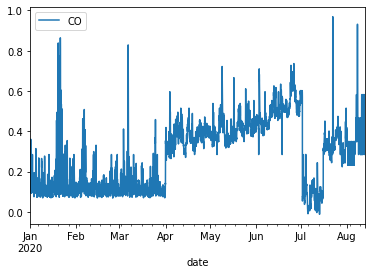

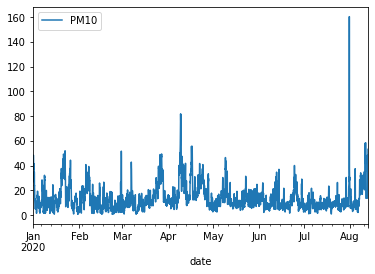

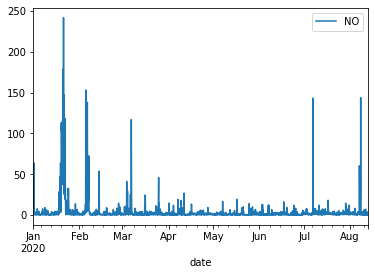

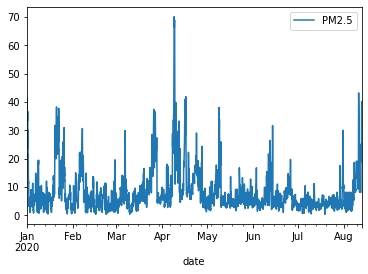

In [34]:
df.plot(x='date', y='CO')
df.plot(x='date', y ='PM10')
df.plot(x='date', y = 'NO')
df.plot(x= 'date', y = 'PM2.5')


###Observation

We can see the variation of pollutant values , throuhout the year

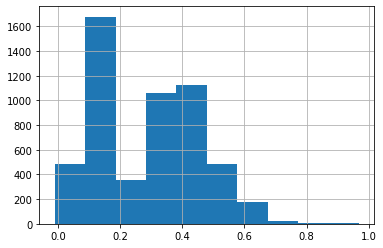

In [35]:
df['CO'].hist()


From the above plot we could see most of the CO values are around 0.2 .

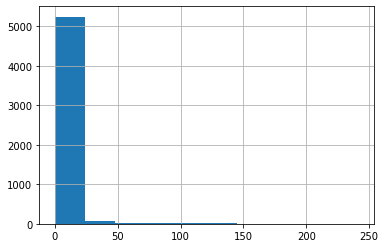

In [36]:
df['NO'].hist()

From the above plot we could see most of the NO values are around 0 to 50 .

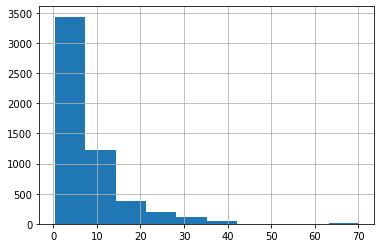

In [37]:
df['PM2.5'].hist()

From the above plot we could see most of the PM2.5 values are around 0 to 5 .

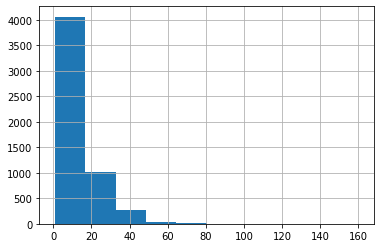

In [38]:
df['PM10'].hist()

From the above plot we could see most of the PM10 values are around 0 to 20 .

In [39]:
df.head()

,date,O3,NO2,CO,SO2,PM10,NOXasNO2,NO,PM2.5,temp,ws,wd,RAWPM25,site,code
0,2020-01-01 00:00:00,1.13090,46.22164,0.213586,NaN,41.850,64.75051,12.08422,35.189,2.3,2.1,92.7,37.300,London N. Kensington,KC1
1,2020-01-01 01:00:00,1.19742,45.01138,0.236887,NaN,43.000,74.07898,18.95739,36.250,1.4,2.1,98.3,38.425,London N. Kensington,KC1
2,2020-01-01 02:00:00,1.49678,41.43513,0.203878,NaN,46.025,60.49783,12.43237,39.623,1.0,2.3,116.6,42.000,London N. Kensington,KC1
3,2020-01-01 03:00:00,1.59656,39.81147,0.203878,NaN,48.525,53.50148,8.92839,41.179,0.8,1.8,131.1,43.650,London N. Kensington,KC1
4,2020-01-01 04:00:00,5.78753,33.62730,0.168928,NaN,45.400,37.65681,2.62798,40.118,0.8,1.7,108.8,42.525,London N. Kensington,KC1


## Highlighting the outliers

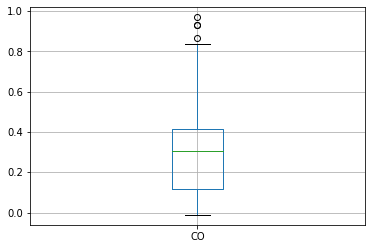

In [40]:
df['CO'].plot.box(grid='True')


We could see that the IQR lies between 0 to 0.8 , and the points above or below it are outliers

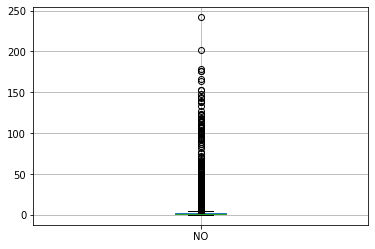

In [41]:
df['NO'].plot.box(grid='True')


We could see that the IQR lies between 0 to 10 , and the points above or below it are outliers

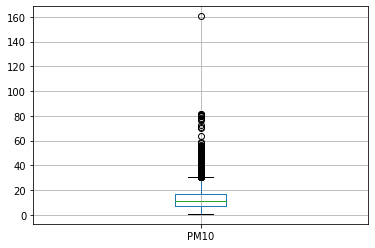

In [42]:
df['PM10'].plot.box(grid='True')


We could see that the IQR lies between 0 to 30 , and the points above or below it are outliers

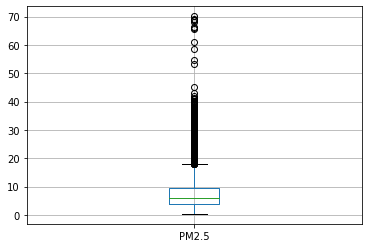

In [43]:
df['PM2.5'].plot.box(grid='True')


We could see that the IQR lies between 0 to 188 , and the points above or below it are outliers

In [44]:
df = df[['date','temp', 'ws','wd','PM10','PM2.5','NO','CO','O3','NO2','NOXasNO2','RAWPM25']]


splitting the datetime values to two columns as date and time seperately

In [45]:
df['date'] = pd.to_datetime(df['date'])
df['Date'] = df['date'].dt.strftime('%d/%m/%Y')
df['Time'] = df['date'].dt.strftime('%H:%M:%S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [46]:
df

,date,temp,ws,wd,PM10,PM2.5,NO,CO,O3,NO2,NOXasNO2,RAWPM25,Date,Time
0,2020-01-01 00:00:00,2.3,2.1,92.7,41.850,35.189,12.08422,0.213586,1.13090,46.22164,64.75051,37.300,01/01/2020,00:00:00
1,2020-01-01 01:00:00,1.4,2.1,98.3,43.000,36.250,18.95739,0.236887,1.19742,45.01138,74.07898,38.425,01/01/2020,01:00:00
2,2020-01-01 02:00:00,1.0,2.3,116.6,46.025,39.623,12.43237,0.203878,1.49678,41.43513,60.49783,42.000,01/01/2020,02:00:00
3,2020-01-01 03:00:00,0.8,1.8,131.1,48.525,41.179,8.92839,0.203878,1.59656,39.81147,53.50148,43.650,01/01/2020,03:00:00
4,2020-01-01 04:00:00,0.8,1.7,108.8,45.400,40.118,2.62798,0.168928,5.78753,33.62730,37.65681,42.525,01/01/2020,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,2020-08-12 19:00:00,24.0,2.5,81.4,32.000,20.755,0.24946,0.465680,153.26976,31.17375,31.55625,22.000,12/08/2020,19:00:00
5396,2020-08-12 20:00:00,23.1,2.6,61.2,27.700,18.962,0.24946,0.465680,148.08094,31.93875,32.32125,20.100,12/08/2020,20:00:00
5397,2020-08-12 21:00:00,22.3,2.8,77.5,37.400,26.793,0.24946,0.284959,148.67965,30.02625,30.40875,28.400,12/08/2020,21:00:00
5398,2020-08-12 22:00:00,22.1,3.4,182.5,42.000,31.227,0.62365,0.523890,137.10459,34.80750,35.76375,33.100,12/08/2020,22:00:00


In [47]:
df = df[['Date','Time','temp','ws','wd','PM10','PM2.5','NO','CO','O3','NO2','NOXasNO2','RAWPM25']]

In [48]:
from datetime import datetime
Date= []
for i in df['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))
df.dtypes

Date         object
Time         object
temp        float64
ws          float64
wd          float64
PM10        float64
PM2.5       float64
NO          float64
CO          float64
O3          float64
NO2         float64
NOXasNO2    float64
RAWPM25     float64
dtype: object

Date and time values are of object datatype , converting it to float type.

In [49]:
date=pd.Series(Date)
df['Date']=pd.to_numeric(date)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
df['Date']=df['Date'].astype(float)
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date        float64
Time         object
temp        float64
ws          float64
wd          float64
PM10        float64
PM2.5       float64
NO          float64
CO          float64
O3          float64
NO2         float64
NOXasNO2    float64
RAWPM25     float64
dtype: object

In [51]:
df.loc[:,'Time']=df['Time']


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
from datetime import datetime
Time= []
for i in df['Time']:
    Time.append(datetime.strptime(i,'%H:%M:%S'))
df.dtypes

Date        float64
Time         object
temp        float64
ws          float64
wd          float64
PM10        float64
PM2.5       float64
NO          float64
CO          float64
O3          float64
NO2         float64
NOXasNO2    float64
RAWPM25     float64
dtype: object

In [53]:

time=pd.Series(Time)
df['Time']=pd.to_numeric(time)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
df['Time']=df['Time'].astype(float)
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date        float64
Time        float64
temp        float64
ws          float64
wd          float64
PM10        float64
PM2.5       float64
NO          float64
CO          float64
O3          float64
NO2         float64
NOXasNO2    float64
RAWPM25     float64
dtype: object

All column values in the dataframe are float values.

In [55]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Visualizing the data using pair plots to determine whether the data is linear.



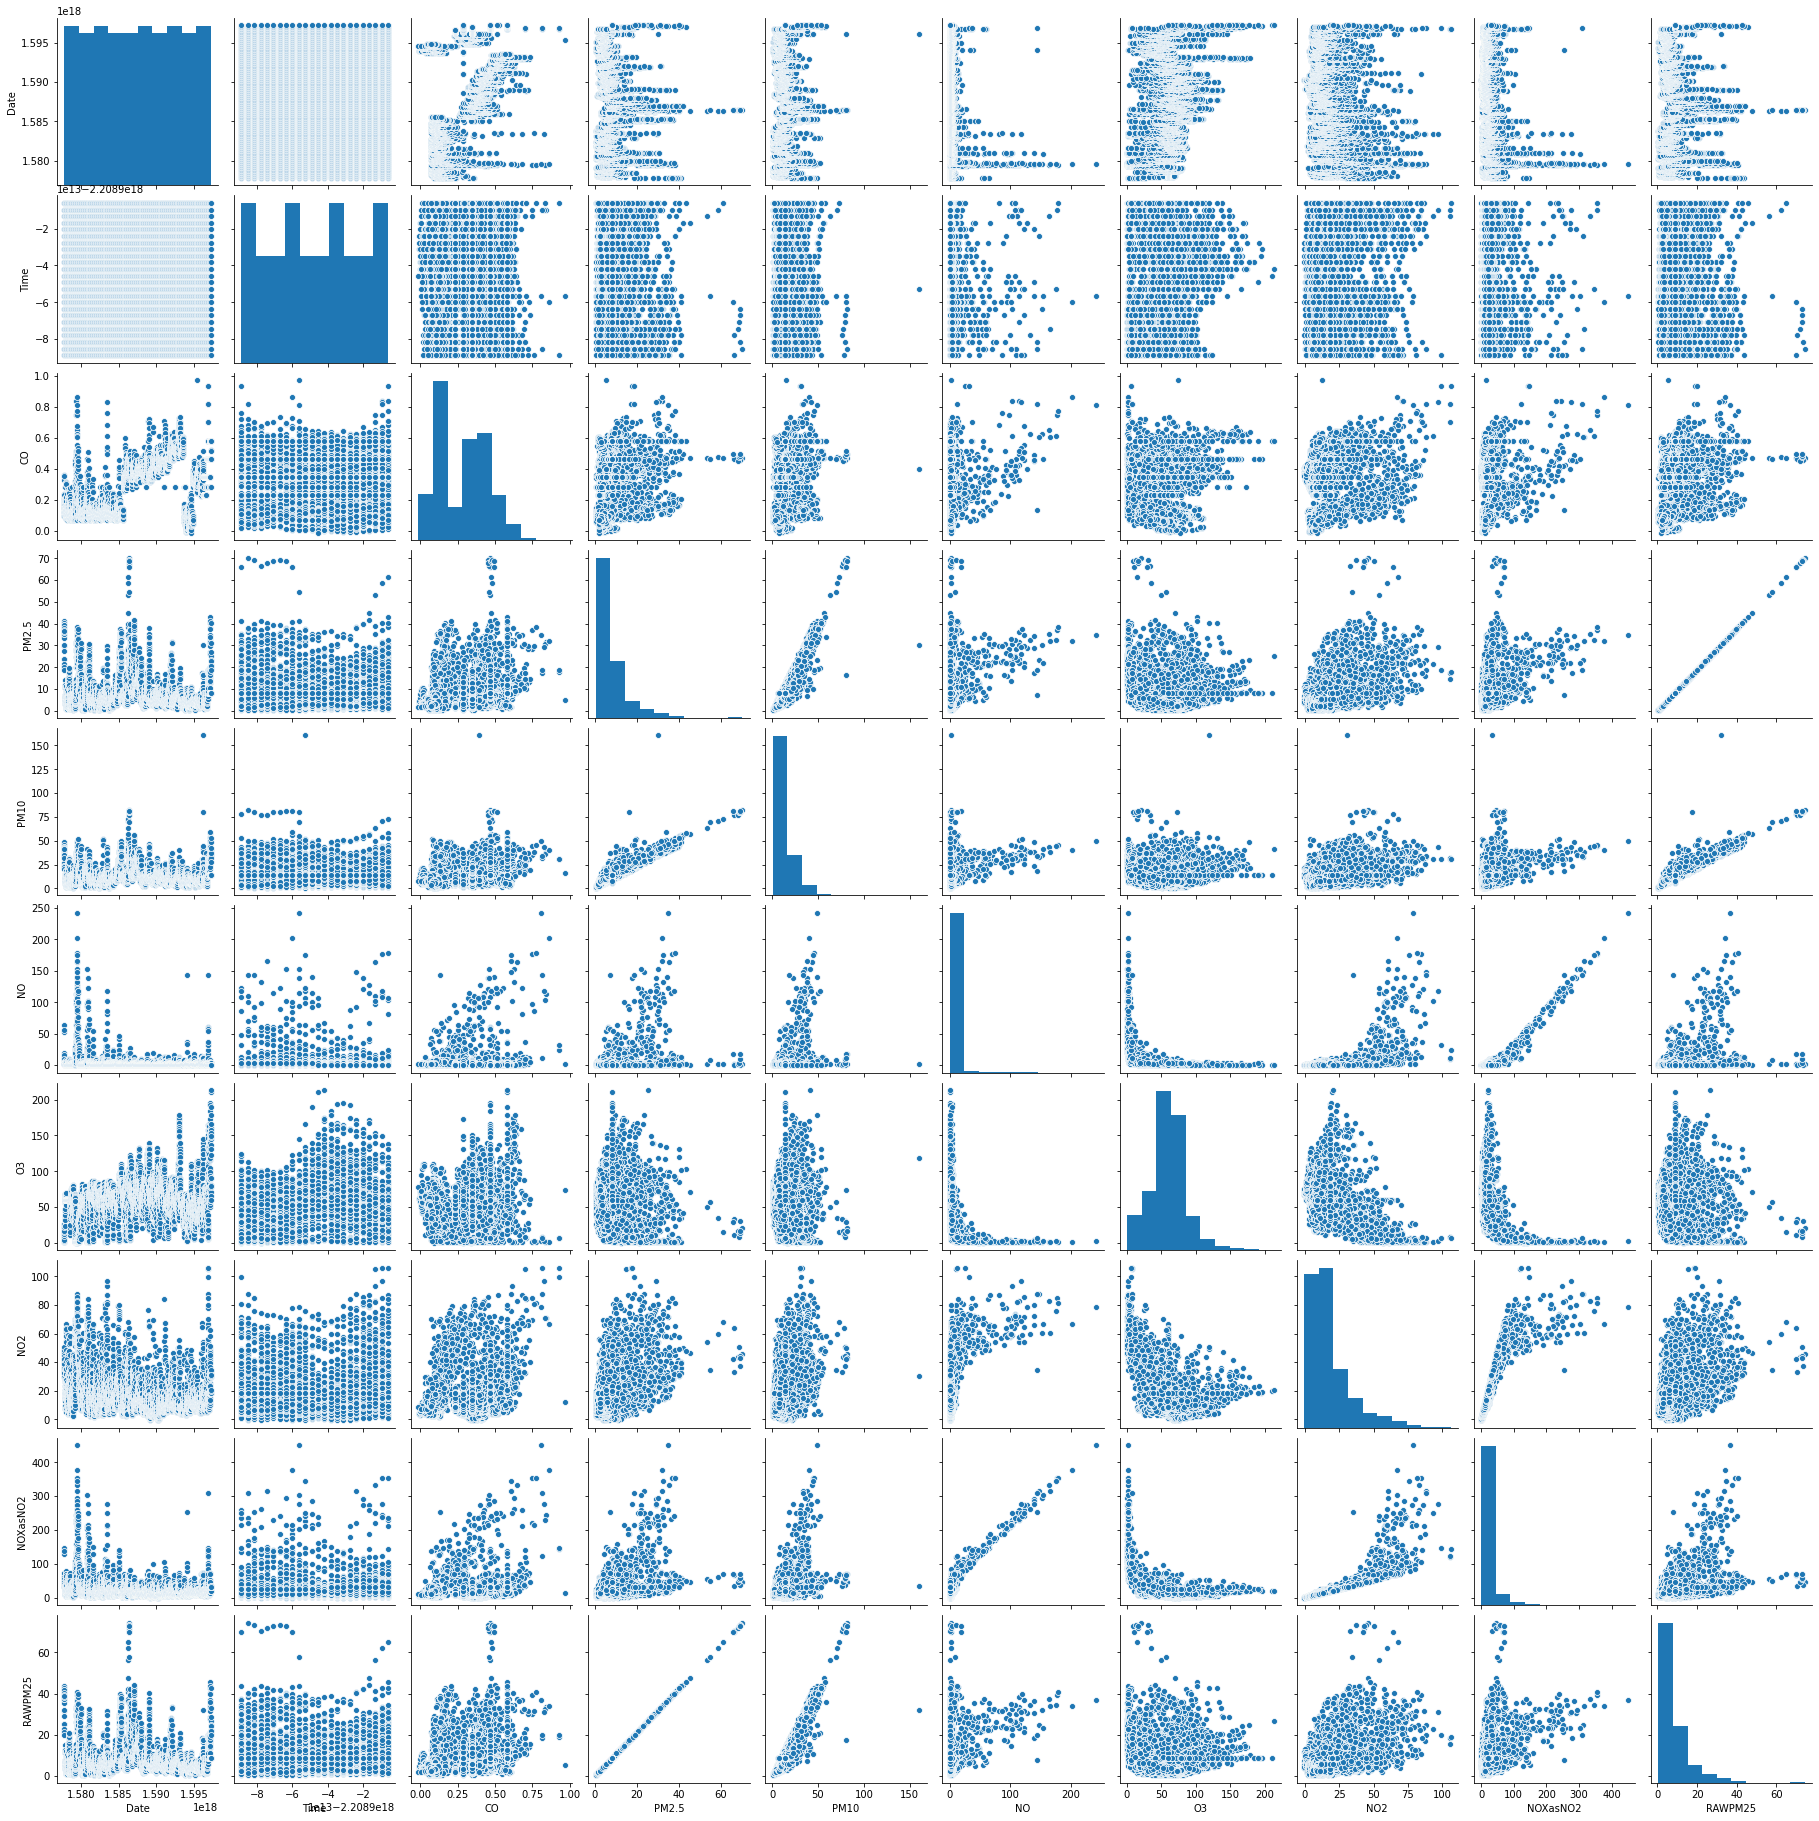

In [56]:
sns.pairplot(df[["Date","Time","CO","PM2.5","PM10","NO",'O3','NO2','NOXasNO2','RAWPM25']],diag_kind = "auto")

Using the Pearson correlation to find out what features contribute most to predicting our target.



In [57]:
df_45=df.corr('pearson')
df_45

,Date,Time,temp,ws,wd,PM10,PM2.5,NO,CO,O3,NO2,NOXasNO2,RAWPM25
Date,1.000000e+00,-7.175127e-18,0.726525,-0.208231,-0.101286,-0.077177,-0.154311,-0.174803,0.535592,0.174811,-0.291097,-0.252419,-0.154312
Time,-7.175127e-18,1.000000e+00,0.119706,0.038549,0.025290,-0.015263,-0.037685,-0.036985,0.016170,0.174917,0.068285,0.007372,-0.037685
temp,7.265252e-01,1.197056e-01,1.000000,0.029214,-0.019913,-0.048034,-0.155942,-0.213222,0.428485,0.467904,-0.345716,-0.303551,-0.155943
ws,-2.082307e-01,3.854920e-02,0.029214,1.000000,0.116873,-0.254469,-0.312547,-0.208945,-0.374376,0.252520,-0.440947,-0.345395,-0.312547
wd,-1.012861e-01,2.528979e-02,-0.019913,0.116873,1.000000,-0.338792,-0.323025,0.076699,-0.247085,-0.216385,-0.025270,0.039202,-0.323024
PM10,-7.717687e-02,-1.526338e-02,-0.048034,-0.254469,-0.338792,1.000000,0.934253,0.304891,0.243006,-0.018354,0.456301,0.416230,0.934254
PM2.5,-1.543113e-01,-3.768474e-02,-0.155942,-0.312547,-0.323025,0.934253,1.000000,0.343863,0.227018,-0.120339,0.501895,0.463487,1.000000
NO,-1.748028e-01,-3.698464e-02,-0.213222,-0.208945,0.076699,0.304891,0.343863,1.000000,0.139816,-0.381443,0.544702,0.919636,0.343863
CO,5.355923e-01,1.616974e-02,0.428485,-0.374376,-0.247085,0.243006,0.227018,0.139816,1.000000,0.108220,0.104721,0.141956,0.227018
O3,1.748115e-01,1.749172e-01,0.467904,0.252520,-0.216385,-0.018354,-0.120339,-0.381443,0.108220,1.000000,-0.552196,-0.512083,-0.120339


## Predicting CO 


In [58]:
abs(df_45['CO']).sort_values(ascending=False)

CO          1.000000
Date        0.535592
temp        0.428485
ws          0.374376
wd          0.247085
PM10        0.243006
PM2.5       0.227018
RAWPM25     0.227018
NOXasNO2    0.141956
NO          0.139816
O3          0.108220
NO2         0.104721
Time        0.016170
Name: CO, dtype: float64

In [102]:
features=df
target=df['CO']

Deleting features wich have very high and very low correlation values .

In [103]:
features=features.drop('Time',axis=1)
features=features.drop('O3',axis=1)
features=features.drop('NO2',axis=1)
features=features.drop('CO',axis=1)

features.tail()

,Date,temp,ws,wd,PM10,PM2.5,NO,NOXasNO2,RAWPM25
5395,1.597190e+18,24.0,2.5,81.4,32.0,20.755,0.24946,31.55625,22.0
5396,1.597190e+18,23.1,2.6,61.2,27.7,18.962,0.24946,32.32125,20.1
5397,1.597190e+18,22.3,2.8,77.5,37.4,26.793,0.24946,30.40875,28.4
5398,1.597190e+18,22.1,3.4,182.5,42.0,31.227,0.62365,35.76375,33.1
5399,1.597190e+18,21.9,2.3,123.3,53.2,40.095,0.49892,31.74750,42.5


In [104]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target)


In [105]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4050, 9) (1350, 9) (4050,) (1350,)


### Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [107]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [0.20152648 0.25745209 0.38096121 ... 0.37786929 0.28198935 0.14553014]


(1350,)

In [108]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))


R^2 score for liner regression:  0.45069441311030134


In [109]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.014952659496861547

In [110]:
import matplotlib.pyplot as plt


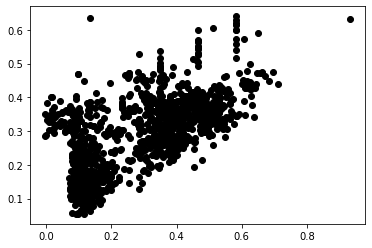

In [111]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

### Decision Tree Regression

In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [114]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999999483967442


In [115]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9422464833582939


In [116]:
print("Predicted values:", dtr.predict(X_test))
y_pred = dtr.predict(X_test)
y_pred.shape

Predicted values: [0.102866 0.398739 0.436575 ... 0.34926  0.094049 0.098526]


(1350,)

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.001572109750384107

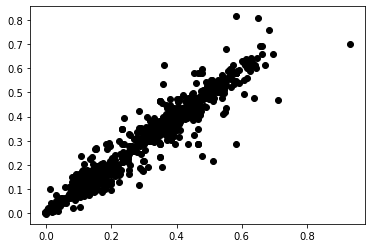

In [118]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

# Prediction NO

In [69]:
abs(df_45['NO']).sort_values(ascending=False)

NO          1.000000
NOXasNO2    0.919636
NO2         0.544702
O3          0.381443
PM2.5       0.343863
RAWPM25     0.343863
PM10        0.304891
temp        0.213222
ws          0.208945
Date        0.174803
CO          0.139816
wd          0.076699
Time        0.036985
Name: NO, dtype: float64

In [119]:
features=df
target=df['NO']

In [120]:
features=features.drop('NOXasNO2',axis=1)

features=features.drop('wd',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('CO',axis=1)
features=features.drop('NO',axis=1)

features.tail()

,Date,temp,ws,PM10,PM2.5,O3,NO2,RAWPM25
5395,1.597190e+18,24.0,2.5,32.0,20.755,153.26976,31.17375,22.0
5396,1.597190e+18,23.1,2.6,27.7,18.962,148.08094,31.93875,20.1
5397,1.597190e+18,22.3,2.8,37.4,26.793,148.67965,30.02625,28.4
5398,1.597190e+18,22.1,3.4,42.0,31.227,137.10459,34.80750,33.1
5399,1.597190e+18,21.9,2.3,53.2,40.095,131.51663,30.98250,42.5


In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [73]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4050, 8) (1350, 8) (4050,) (1350,)


### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [75]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [13.6679862  15.79897684 -2.68124423 ... -5.46781358 -0.40777158
 -3.00529578]


(1350,)

In [76]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))


R^2 score for liner regression:  0.2973493659868801


In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

117.66082659090041

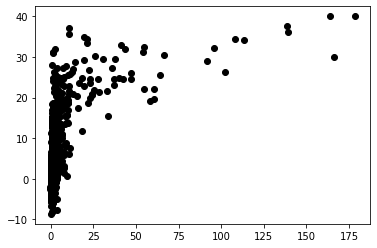

In [78]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

### Decision Tree Regression

In [121]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [122]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999999483967442


In [123]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_test, y_test)))


Coefficient of determination R^2 <-- on train set: 0.939265747914148


In [124]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.001572109750384107

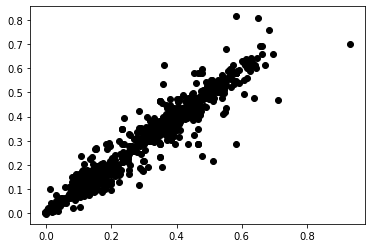

In [125]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

# Predicting PM10 

In [79]:
abs(df_45['PM10']).sort_values(ascending=False)

PM10        1.000000
RAWPM25     0.934254
PM2.5       0.934253
NO2         0.456301
NOXasNO2    0.416230
wd          0.338792
NO          0.304891
ws          0.254469
CO          0.243006
Date        0.077177
temp        0.048034
O3          0.018354
Time        0.015263
Name: PM10, dtype: float64

In [126]:
features=df
target=df['PM10']

In [127]:
features=features.drop('PM2.5',axis=1)
features=features.drop('RAWPM25',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('O3',axis=1)
features=features.drop('PM10',axis=1)

features.tail()

,Date,temp,ws,wd,NO,CO,NO2,NOXasNO2
5395,1.597190e+18,24.0,2.5,81.4,0.24946,0.465680,31.17375,31.55625
5396,1.597190e+18,23.1,2.6,61.2,0.24946,0.465680,31.93875,32.32125
5397,1.597190e+18,22.3,2.8,77.5,0.24946,0.284959,30.02625,30.40875
5398,1.597190e+18,22.1,3.4,182.5,0.62365,0.523890,34.80750,35.76375
5399,1.597190e+18,21.9,2.3,123.3,0.49892,0.512248,30.98250,31.74750


### Linear Regression

In [128]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

(4050, 8) (1350, 8) (4050,) (1350,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [129]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [ 9.16359431 14.9317549  14.19188089 ... 15.73757943  9.75595561
 10.25833411]


(1350,)

R^2 score for liner regression:  0.3502602452585487


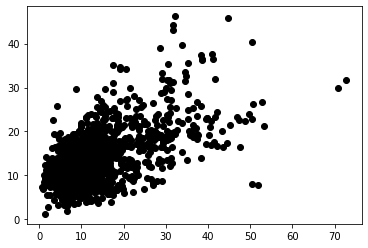

In [130]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

plt.scatter(y_test,y_pred,color='black')
plt.show()

### Decision Tree Regression

In [132]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
print("Predicted values:", dtr.predict(X_test))
y_pred = dtr.predict(X_test)
y_pred.shape

Predicted values: [ 3.05  15.975 11.025 ... 18.2   17.325  4.55 ]


(1350,)

R^2 score for decision tree regression:  0.6289571781504768


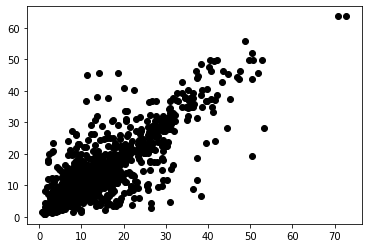

In [135]:
print("R^2 score for decision tree regression: ", dtr.score(X_test, y_test))

plt.scatter(y_test,y_pred,color='black')
plt.show()

# Predicting PM2.5

In [86]:
abs(df_45['PM2.5']).sort_values(ascending=False)

PM2.5       1.000000
RAWPM25     1.000000
PM10        0.934253
NO2         0.501895
NOXasNO2    0.463487
NO          0.343863
wd          0.323025
ws          0.312547
CO          0.227018
temp        0.155942
Date        0.154311
O3          0.120339
Time        0.037685
Name: PM2.5, dtype: float64

In [136]:
features=df
target=df['PM2.5']

In [137]:
features=features.drop('PM2.5',axis=1)
features=features.drop('RAWPM25',axis=1)


### linear regression

In [138]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

(4050, 11) (1350, 11) (4050,) (1350,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [139]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape

Predicted values: [ 5.01843172 13.22355267  3.87021066 ...  7.47070939  4.60965215
  9.20345245]


(1350,)

R^2 score for liner regression:  0.9088709006448249


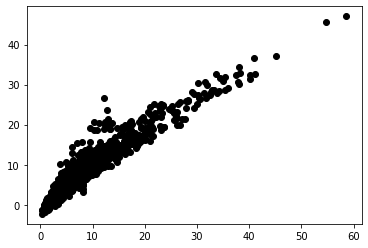

In [140]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

plt.scatter(y_test,y_pred,color='black')
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4.513404434029614

### Decision Tree Regression

In [142]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [143]:
print("Predicted values:", dtr.predict(X_test))
y_pred = dtr.predict(X_test)
y_pred.shape

Predicted values: [ 3.09       12.618       8.13952937 ...  7.193       4.505
  7.406     ]


(1350,)

R^2 score for decision tree regression:  0.9387604267503846


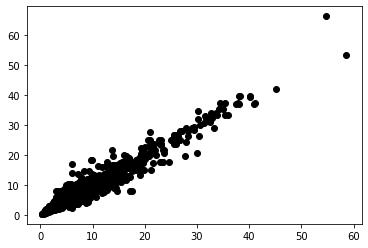

In [144]:
print("R^2 score for decision tree regression: ", dtr.score(X_test, y_test))

plt.scatter(y_test,y_pred,color='black')
plt.show()

# Conclusion

1. I have worked on linear regression and decision tree to predict the pollutant , we could also work on other regression techniques like LASSO .

2. I have tried mean sampling to fill the missing values in the data, we could also try  other thecniques like forward fill and backward fill.

3. We could try regression after removing the outliers .
 